In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("CleanedData/cleandata.csv")

In [3]:
data.head()

,Unnamed: 0,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,0,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
2,2,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
3,3,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
4,4,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1


In [4]:
data.columns

Index(['Unnamed: 0', 'Age (years)', 'Blood Pressure (mm/Hg)',
       'Specific Gravity', 'Albumin', 'Sugar', 'Red Blood Cells', 'Pus Cells',
       'Pus Cell Clumps', 'Bacteria', 'Blood Glucose Random (mgs/dL)',
       'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)',
       'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease'],
      dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,122.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
1,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
2,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
3,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
4,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1


### **Important Features Selections**

In [7]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

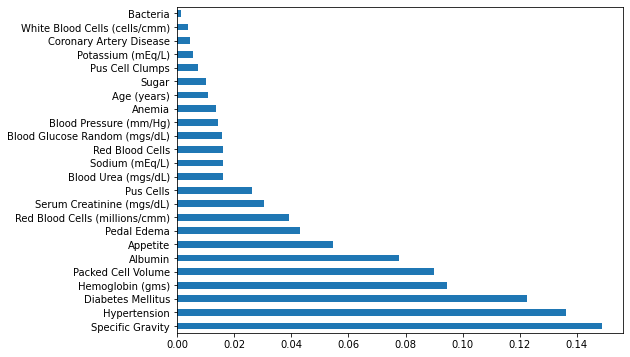

In [8]:
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [9]:
ranked_features.nlargest(8).index

Index(['Specific Gravity', 'Hypertension', 'Diabetes Mellitus',
       'Hemoglobin (gms)', 'Packed Cell Volume', 'Albumin', 'Appetite',
       'Pedal Edema'],
      dtype='object')

In [10]:
X = data[['Diabetes Mellitus', 'Specific Gravity', 'Hypertension',
       'Hemoglobin (gms)', 'Albumin', 'Packed Cell Volume', 'Appetite',
       'Red Blood Cells (millions/cmm)']]
X.head()

,Diabetes Mellitus,Specific Gravity,Hypertension,Hemoglobin (gms),Albumin,Packed Cell Volume,Appetite,Red Blood Cells (millions/cmm)
0,0.0,1.020,0.0,11.3,4.0,38.0,1.0,4.8
1,1.0,1.010,0.0,9.6,2.0,31.0,0.0,4.8
2,0.0,1.005,1.0,11.2,4.0,32.0,0.0,3.9
3,0.0,1.010,0.0,11.6,2.0,35.0,1.0,4.6
4,1.0,1.015,1.0,12.2,3.0,39.0,1.0,4.4


In [11]:
X.tail()

,Diabetes Mellitus,Specific Gravity,Hypertension,Hemoglobin (gms),Albumin,Packed Cell Volume,Appetite,Red Blood Cells (millions/cmm)
674,1.0,1.010,1.0,9.8,1.0,28.0,1.0,3.2
675,1.0,1.020,1.0,6.0,0.0,17.0,1.0,4.8
676,0.0,1.025,0.0,14.3,0.0,41.0,1.0,5.0
677,0.0,1.020,0.0,13.6,0.0,44.0,1.0,6.4
678,0.0,1.010,0.0,13.9,0.0,52.0,1.0,4.8


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Chronic Kidney Disease, dtype: int64

##### ***Train Test Split***

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [14]:
X_train.shape

(475, 8)

In [15]:
X_test.shape

(204, 8)

In [16]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score

#### **1. Random Forest Tree**

In [17]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Prediction from test data:
y_pred = RandomForest.predict(X_test)

# Accuracy:
print('Accuracy:', accuracy_score(y_test,y_pred))


Accuracy: 1.0


#### **2. Gradient Boosting**

In [18]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Prediction from test data:
y_pred = GradientBoost.predict(X_test)

# Accuracy:
print('Accuracy:', accuracy_score(y_test,y_pred))


Accuracy: 0.9901960784313726


#### **3. Decision Tree**

In [19]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train,y_train)

# Prediction from test data:
y_pred = DecisionTree.predict(X_test)

# Accuracy:
print('Accuracy:', accuracy_score(y_test,y_pred))

Accuracy: 1.0


#### **4. ANN-Model**

In [20]:
import tensorflow as tf
import keras as k
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [21]:
classifier = Sequential()
#Input Layer
classifier.add(Dense(units = 196, activation='relu'))
#First Hidden layer
classifier.add(Dense(units = 135, activation='relu'))
#Second Hidden Layer
classifier.add(Dense(units=134, activation='relu'))


In [22]:
# Output layer
classifier.add(Dense(1, activation= 'sigmoid'))

In [23]:
classifier.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [24]:
#train the model
ann_model = classifier.fit(X_train, y_train, epochs = 200, batch_size = X_train.shape[0])

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 0.9301 - accuracy: 0.6189
Epoch 2/200
1/1 [==============================] - 0s 14ms/step - loss: 0.9153 - accuracy: 0.3811
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 0.7859 - accuracy: 0.3811
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6687 - accuracy: 0.6189
Epoch 5/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7626 - accuracy: 0.6189
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 0.7358 - accuracy: 0.6189
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6449 - accuracy: 0.6189
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6349 - accuracy: 0.7347
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6643 - accuracy: 0.4989
Epoch 10/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6413 - accuracy: 0.5705
Epoch 11/200
1/1 [=========

In [25]:
print(np.mean(ann_model.history['accuracy']))

0.9045368447899819


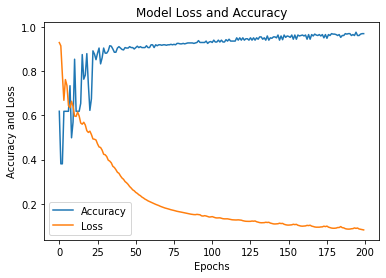

In [26]:
#visualie model loss and accuracy

plt.plot(ann_model.history['accuracy'],label='Accuracy')
plt.plot(ann_model.history['loss'],label='Loss')
plt.title('Model Loss and Accuracy')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')   
plt.legend();

In [27]:
print("shape of training data: ",X_train.shape)
print("shape of test data: ",X_test.shape)

shape of training data:  (475, 8)
shape of test data:  (204, 8)


In [28]:
#show actual and predicted value
pred = classifier.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]

print('Original:  {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(",".join(str(x) for x in pred)))

Original:  1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,1
Predicted: 1,1,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,1


In [29]:
import pickle

In [30]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Creating a pickle file for the classifier
filename = 'ckd_model.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))
